In [572]:
import pandas as pd
merged_df = pd.read_csv('https://raw.githubusercontent.com/GBov81/pandas-challenge/main/schools_complete.csv')\
    .merge(pd.read_csv('https://raw.githubusercontent.com/GBov81/pandas-challenge/main/students_complete.csv'), on='school_name')

# Calculate the mean reading and math scores for each grade individually
grades = ['9th', '10th', '11th', '12th']

formatted_results = {grade: {subject: merged_df[merged_df['grade'] == grade].groupby('school_name')[f'{subject}_score'].mean() for subject in ['reading', 'math']} for grade in grades}

mean_scores = {'reading': merged_df.groupby('school_name')['reading_score'].mean(),'math': merged_df.groupby('school_name')['math_score'].mean()}

passing_percentages = ((merged_df['reading_score'] > 70).groupby(merged_df['school_name']).mean() * 100, (merged_df['math_score'] > 70).groupby(merged_df['school_name']).mean() * 100)

school_info = merged_df.groupby('school_name').agg({'type': 'first', 'size': 'first', 'budget': 'first'}).reset_index().assign(cost_per_student=lambda x: x['budget'] / x['size'])

cost_diff = merged_df.groupby('type')['budget'].sum() / merged_df.groupby('type')['size'].sum()





C:\Users\gbovi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\gbovi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\gbovi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

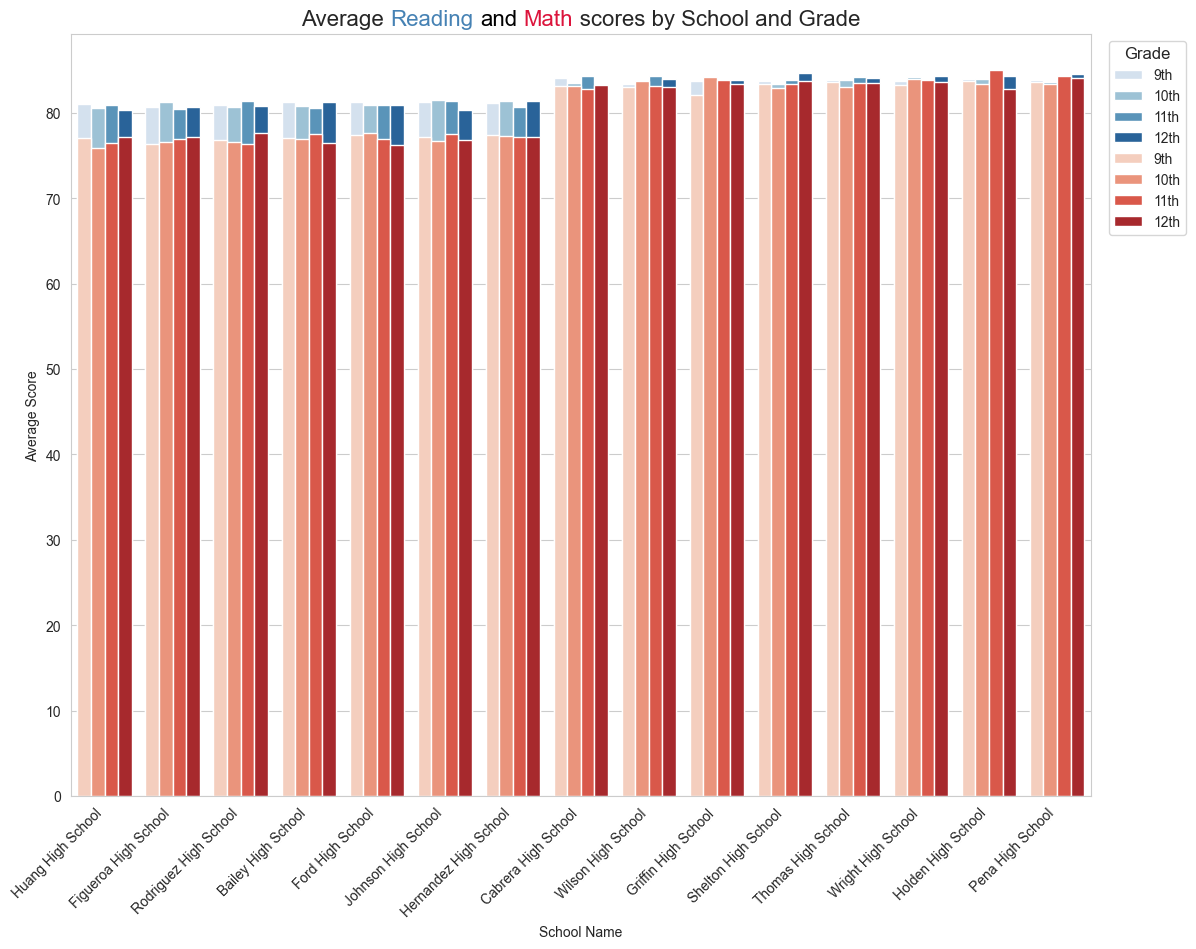

In [573]:
import matplotlib.pyplot as plt
import seaborn as sns

palette = {'reading': 'Blues', 'math': 'Reds'}

plt.figure(figsize=(12, 10))

for subject in ['reading', 'math']:
    df_subject = merged_df.pivot_table(index='school_name', columns='grade', values=f'{subject}_score', aggfunc='mean', fill_value=0)[grades].reset_index()
    df_subject_melted = pd.melt(df_subject, id_vars='school_name', var_name='grade', value_name=f'average_{subject}_score')
    
    sns.barplot(data=df_subject_melted, x='school_name', y=f'average_{subject}_score', hue='grade', palette=palette[subject], order=df_subject_melted.groupby('school_name')[f'average_{subject}_score'].mean().sort_values().index)

# Set the title with colored text
plt.title('Average                                scores by School and Grade', loc='center', fontdict={'fontsize': 16})
plt.xlabel('School Name')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Average Score')
plt.legend(title='Grade', title_fontsize='12', loc='best', bbox_to_anchor=(1.1, 1))

# Manually add colored text to the title
plt.text(0.3322, 0.9289, 'Reading', color='steelblue', fontsize=16, transform=plt.gcf().transFigure)
plt.text(0.4066, 0.9289, 'and', color='black', fontsize=16, transform=plt.gcf().transFigure)
plt.text(0.4432, 0.9289, 'Math', color='crimson', fontsize=16, transform=plt.gcf().transFigure)

plt.tight_layout()

plt.show()























   







    
   























